# CoinMarketCap API Examples

This notebook demonstrates how to use the CoinMarketCap API to retrieve and analyze cryptocurrency market capitalization data. The examples correspond to the code snippets from the article "Understanding and Accessing Cryptocurrency Market Capitalization with CoinMarketCap."

## Setup and Prerequisites

Before running this notebook:

1. Sign up for a CoinMarketCap API key at [pro.coinmarketcap.com](https://pro.coinmarketcap.com/)
2. Replace "YOUR_API_KEY_HERE" with your actual API key in the code cells below
3. Install required packages if not already installed (`requests`, `pandas`, `matplotlib`)

In [1]:
# Install required packages
# Uncomment if not already installed
%pip install requests pandas matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Basic API Request for Market Cap Data

The following function fetches market cap data for specified cryptocurrencies.

In [2]:
import requests
from pprint import pprint

# Get API key from user input
api_key = input("Please enter your CoinMarketCap API key: ")

def get_market_cap_data(symbols=["BTC", "ETH"]):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"
    
    headers = {
        "X-CMC_PRO_API_KEY": api_key,
        "Accept": "application/json"
    }
    
    parameters = {
        "symbol": ",".join(symbols),
        "convert": "USD"
    }
    
    response = requests.get(url, headers=headers, params=parameters)
    data = response.json()
    
    results = {}
    if data["status"]["error_code"] == 0:
        for symbol in symbols:
            if symbol in data["data"]:
                crypto_data = data["data"][symbol]
                results[symbol] = {
                    "name": crypto_data["name"],
                    "symbol": crypto_data["symbol"],
                    "price": crypto_data["quote"]["USD"]["price"],
                    "market_cap": crypto_data["quote"]["USD"]["market_cap"],
                    "circulating_supply": crypto_data["circulating_supply"],
                    "total_supply": crypto_data["total_supply"],
                    "max_supply": crypto_data["max_supply"],
                    "percent_change_24h": crypto_data["quote"]["USD"]["percent_change_24h"]
                }
    
    return results

In [3]:
# Example usage
market_data = get_market_cap_data(["BTC", "ETH", "XRP"])
pprint(market_data)

{'BTC': {'circulating_supply': 19874184,
         'market_cap': 2094739944942.4739,
         'max_supply': 21000000,
         'name': 'Bitcoin',
         'percent_change_24h': -0.05830471,
         'price': 105400.0478682533,
         'symbol': 'BTC',
         'total_supply': 19874184},
 'ETH': {'circulating_supply': 120722947.78116943,
         'market_cap': 317942317338.70807,
         'max_supply': None,
         'name': 'Ethereum',
         'percent_change_24h': 0.49398827,
         'price': 2633.6526996924545,
         'symbol': 'ETH',
         'total_supply': 120722947.78116943},
 'XRP': {'circulating_supply': 58759724027,
         'market_cap': 131520711412.04178,
         'max_supply': 100000000000,
         'name': 'XRP',
         'percent_change_24h': 1.65825214,
         'price': 2.2382799373191102,
         'symbol': 'XRP',
         'total_supply': 99986084900}}


## 2. Tracking Top Cryptocurrencies by Market Cap

This function retrieves the top N cryptocurrencies sorted by market cap.

In [6]:
import requests
import pandas as pd
from datetime import datetime

def get_top_cryptocurrencies_by_market_cap(limit=10):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    
    headers = {
        "X-CMC_PRO_API_KEY": api_key,
        "Accept": "application/json"
    }
    
    parameters = {
        "start": "1",
        "limit": str(limit),
        "convert": "USD",
        "sort": "market_cap",
        "sort_dir": "desc"
    }
    
    response = requests.get(url, headers=headers, params=parameters)
    data = response.json()
    
    crypto_data = []
    
    if data["status"]["error_code"] == 0:
        for crypto in data["data"]:
            crypto_data.append({
                "rank": crypto["cmc_rank"],
                "name": crypto["name"],
                "symbol": crypto["symbol"],
                "price_usd": crypto["quote"]["USD"]["price"],
                "market_cap_usd": crypto["quote"]["USD"]["market_cap"],
                "volume_24h_usd": crypto["quote"]["USD"]["volume_24h"],
                "percent_change_24h": crypto["quote"]["USD"]["percent_change_24h"],
                "circulating_supply": crypto["circulating_supply"]
            })
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(crypto_data)
    
    # Add timestamp
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Data retrieved at: {timestamp}")
    
    return df

In [7]:
# Example usage
top_cryptos = get_top_cryptocurrencies_by_market_cap(20)
print(top_cryptos)

Data retrieved at: 2025-06-04 12:42:39
    rank          name symbol      price_usd  market_cap_usd  volume_24h_usd  \
0      1       Bitcoin    BTC  105378.705398    2.094316e+12    4.484437e+10   
1      2      Ethereum    ETH    2632.427861    3.177945e+11    1.642488e+10   
2      3   Tether USDt   USDT       1.000525    1.533931e+11    6.666213e+10   
3      4           XRP    XRP       2.238067    1.315082e+11    2.401092e+09   
4      5           BNB    BNB     669.543337    9.433020e+10    1.624990e+09   
5      6        Solana    SOL     156.754981    8.191009e+10    3.358309e+09   
6      7          USDC   USDC       0.999818    6.147279e+10    9.822657e+09   
7      8      Dogecoin   DOGE       0.196152    2.933304e+10    8.651162e+08   
8      9          TRON    TRX       0.269681    2.558199e+10    4.031197e+08   
9     10       Cardano    ADA       0.696192    2.460490e+10    5.357515e+08   
10    11   Hyperliquid   HYPE      36.686665    1.225071e+10    3.238872e+08   
1

### Visualization: Market Cap Distribution of Top 10 Cryptocurrencies

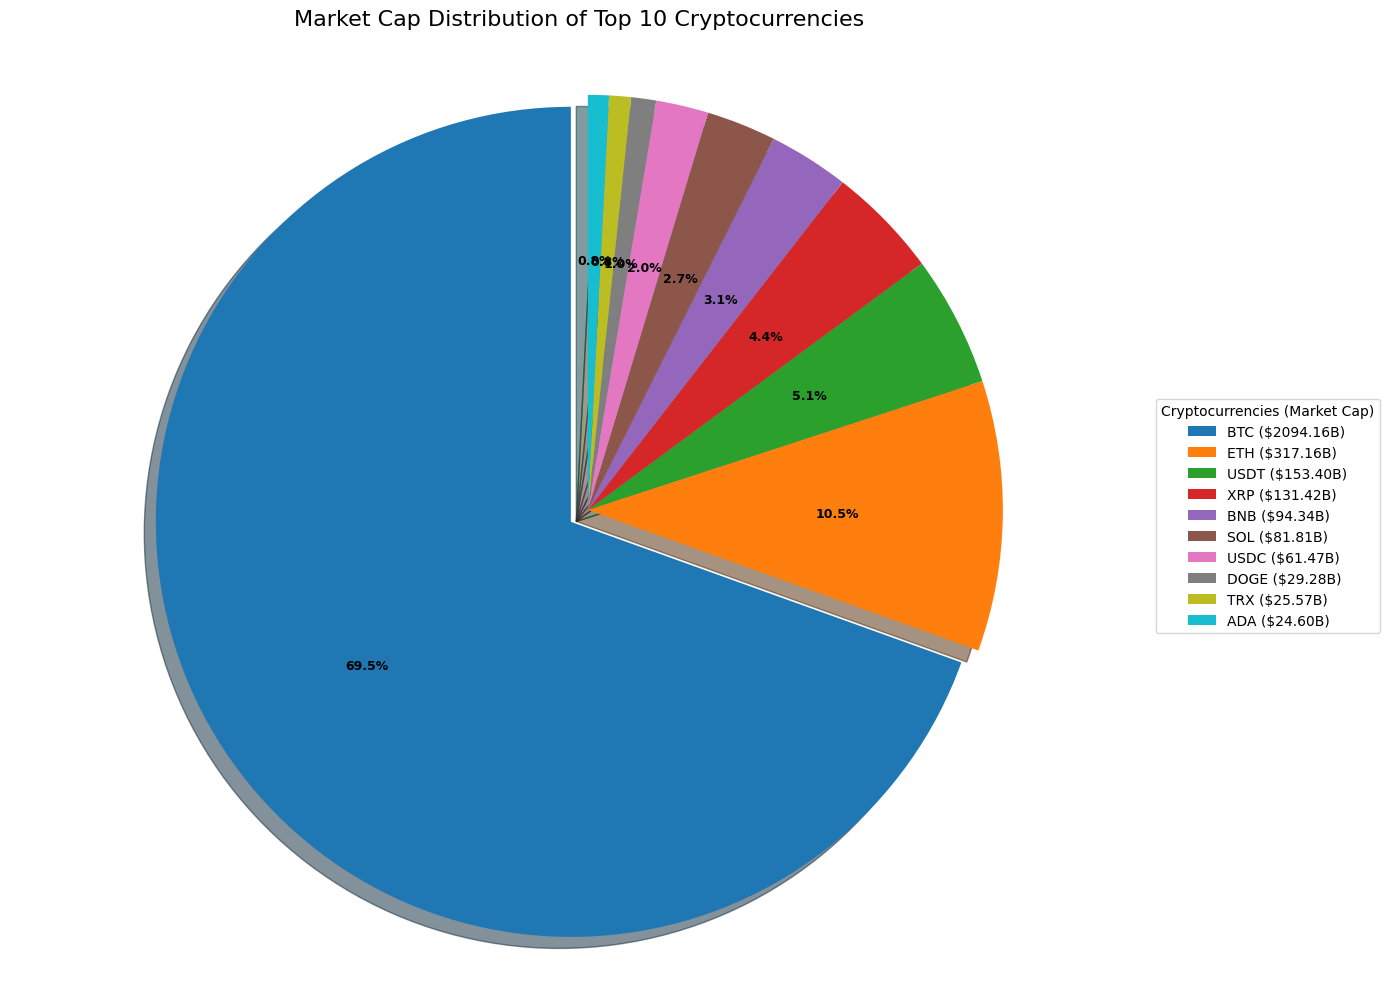

In [12]:
# Let's create a pie chart showing market cap distribution
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_market_cap_distribution(df, top_n=10):
    # Take top N currencies
    df_top = df.head(top_n)
    
    # Format market cap values to billions for better readability
    market_caps_billions = df_top['market_cap_usd'] / 1e9
    labels = [f"{symbol} (${cap:.2f}B)" for symbol, cap in zip(df_top['symbol'], market_caps_billions)]
    
    # Create a colorful palette
    colors = list(mcolors.TABLEAU_COLORS.values())[:top_n]
    
    # Create a pie chart of market cap distribution
    plt.figure(figsize=(14, 10))
    wedges, texts, autotexts = plt.pie(
        df_top['market_cap_usd'], 
        labels=None,  # Remove labels from pie slices
        autopct='%1.1f%%', 
        startangle=90,
        shadow=True,
        colors=colors,
        explode=[0.05 if i == 0 else 0 for i in range(len(df_top))]  # Explode the largest slice
    )
    
    # Enhance the appearance of percentage text
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_fontweight('bold')
    
    plt.title(f'Market Cap Distribution of Top {top_n} Cryptocurrencies', fontsize=16, pad=20)
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
    
    # Add a legend on the right side
    plt.legend(
        wedges, 
        labels,
        title="Cryptocurrencies (Market Cap)",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    plt.tight_layout()
    plt.show()

# Get the data and plot
plot_market_cap_distribution(top_cryptos)

## calculating additional market cap metrics

In [25]:
def calculate_market_metrics(symbols=["BTC", "ETH", "XRP"]):
    """
    Calculate various market-related metrics for the specified cryptocurrencies
    """
    # Get basic market data
    market_data = get_market_cap_data(symbols)
    
    # Get top 100 cryptos to calculate total market
    top_100 = get_top_cryptocurrencies_by_market_cap(100)
    total_market_cap = top_100["market_cap_usd"].sum()
    
    # Calculate additional metrics
    results = []
    for symbol in symbols:
        if symbol in market_data:
            data = market_data[symbol]
            
            # Calculate volume/market cap ratio (higher values may indicate more trading activity relative to size)
            volume_to_mc_ratio = None
            if "volume_24h" in data:
                volume_to_mc_ratio = data["volume_24h"] / data["market_cap"] if data["market_cap"] > 0 else None
            
            # Calculate dominance (percentage of total market cap)
            dominance = (data["market_cap"] / total_market_cap) * 100 if total_market_cap > 0 else None
            
            # Calculate fully diluted market cap (if max supply is available)
            fully_diluted_mc = None
            if data["max_supply"] is not None:
                fully_diluted_mc = data["price"] * data["max_supply"]
            
            results.append({
                "symbol": symbol,
                "name": data["name"],
                "price_usd": data["price"],
                "market_cap_usd": data["market_cap"],
                "volume_to_mc_ratio": volume_to_mc_ratio,
                "market_dominance_percent": dominance,
                "fully_diluted_market_cap": fully_diluted_mc,
                "circulating_to_max_ratio": data["circulating_supply"] / data["max_supply"] * 100 if data["max_supply"] else None
            })
    
    metrics_df = pd.DataFrame(results)
    return metrics_df

In [22]:
# Calculate and display additional market metrics
metrics = calculate_market_metrics(["BTC", "ETH", "XRP", "LTC", "DOGE"])
print(metrics)

Data retrieved at: 2025-06-04 13:13:33
  symbol      name      price_usd  market_cap_usd volume_to_mc_ratio  \
0    BTC   Bitcoin  105356.827299    2.093883e+12               None   
1    ETH  Ethereum    2627.422562    3.171902e+11               None   
2    XRP       XRP       2.230877    1.310857e+11               None   
3    LTC  Litecoin      90.181876    6.847347e+09               None   
4   DOGE  Dogecoin       0.195226    2.919466e+10               None   

   market_dominance_percent  fully_diluted_market_cap  \
0                 64.264657              2.212493e+12   
1                  9.735082                       NaN   
2                  4.023233              2.230877e+11   
3                  0.210156              7.575278e+09   
4                  0.896032                       NaN   

   circulating_to_max_ratio  
0                 94.639048  
1                       NaN  
2                 58.759724  
3                 90.390709  
4                       NaN  


##  Creating a Market Cap Dashboard Visualization

In [26]:
def create_market_cap_dashboard():
    """
    Create a dashboard-like visualization showing multiple market cap metrics
    """
    # Get data for top 20 cryptocurrencies
    top_20 = get_top_cryptocurrencies_by_market_cap(20)
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(16, 14))
    
    # 1. Market cap distribution (top 5)
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    top_5 = top_20.head(5)
    ax1.pie(
        top_5['market_cap_usd'], 
        labels=top_5['symbol'], 
        autopct='%1.1f%%', 
        startangle=90,
        shadow=True
    )
    ax1.set_title('Market Cap Distribution (Top 5)')
    ax1.axis('equal')
    
    # 2. Bar chart of market caps (top 10)
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    top_10 = top_20.head(10)
    ax2.bar(top_10['symbol'], top_10['market_cap_usd'] / 1e9)
    ax2.set_title('Market Cap in Billion USD (Top 10)')
    ax2.set_ylabel('Billion USD')
    ax2.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    
    # 3. 24h percent change comparison (top 20)
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
    colors = ['g' if x >= 0 else 'r' for x in top_20['percent_change_24h']]
    ax3.bar(top_20['symbol'], top_20['percent_change_24h'], color=colors)
    ax3.set_title('24h Price Change (%)')
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig("crypto_market_cap_dashboard.png")
    plt.show()
    
    return top_20

Data retrieved at: 2025-06-04 13:13:53


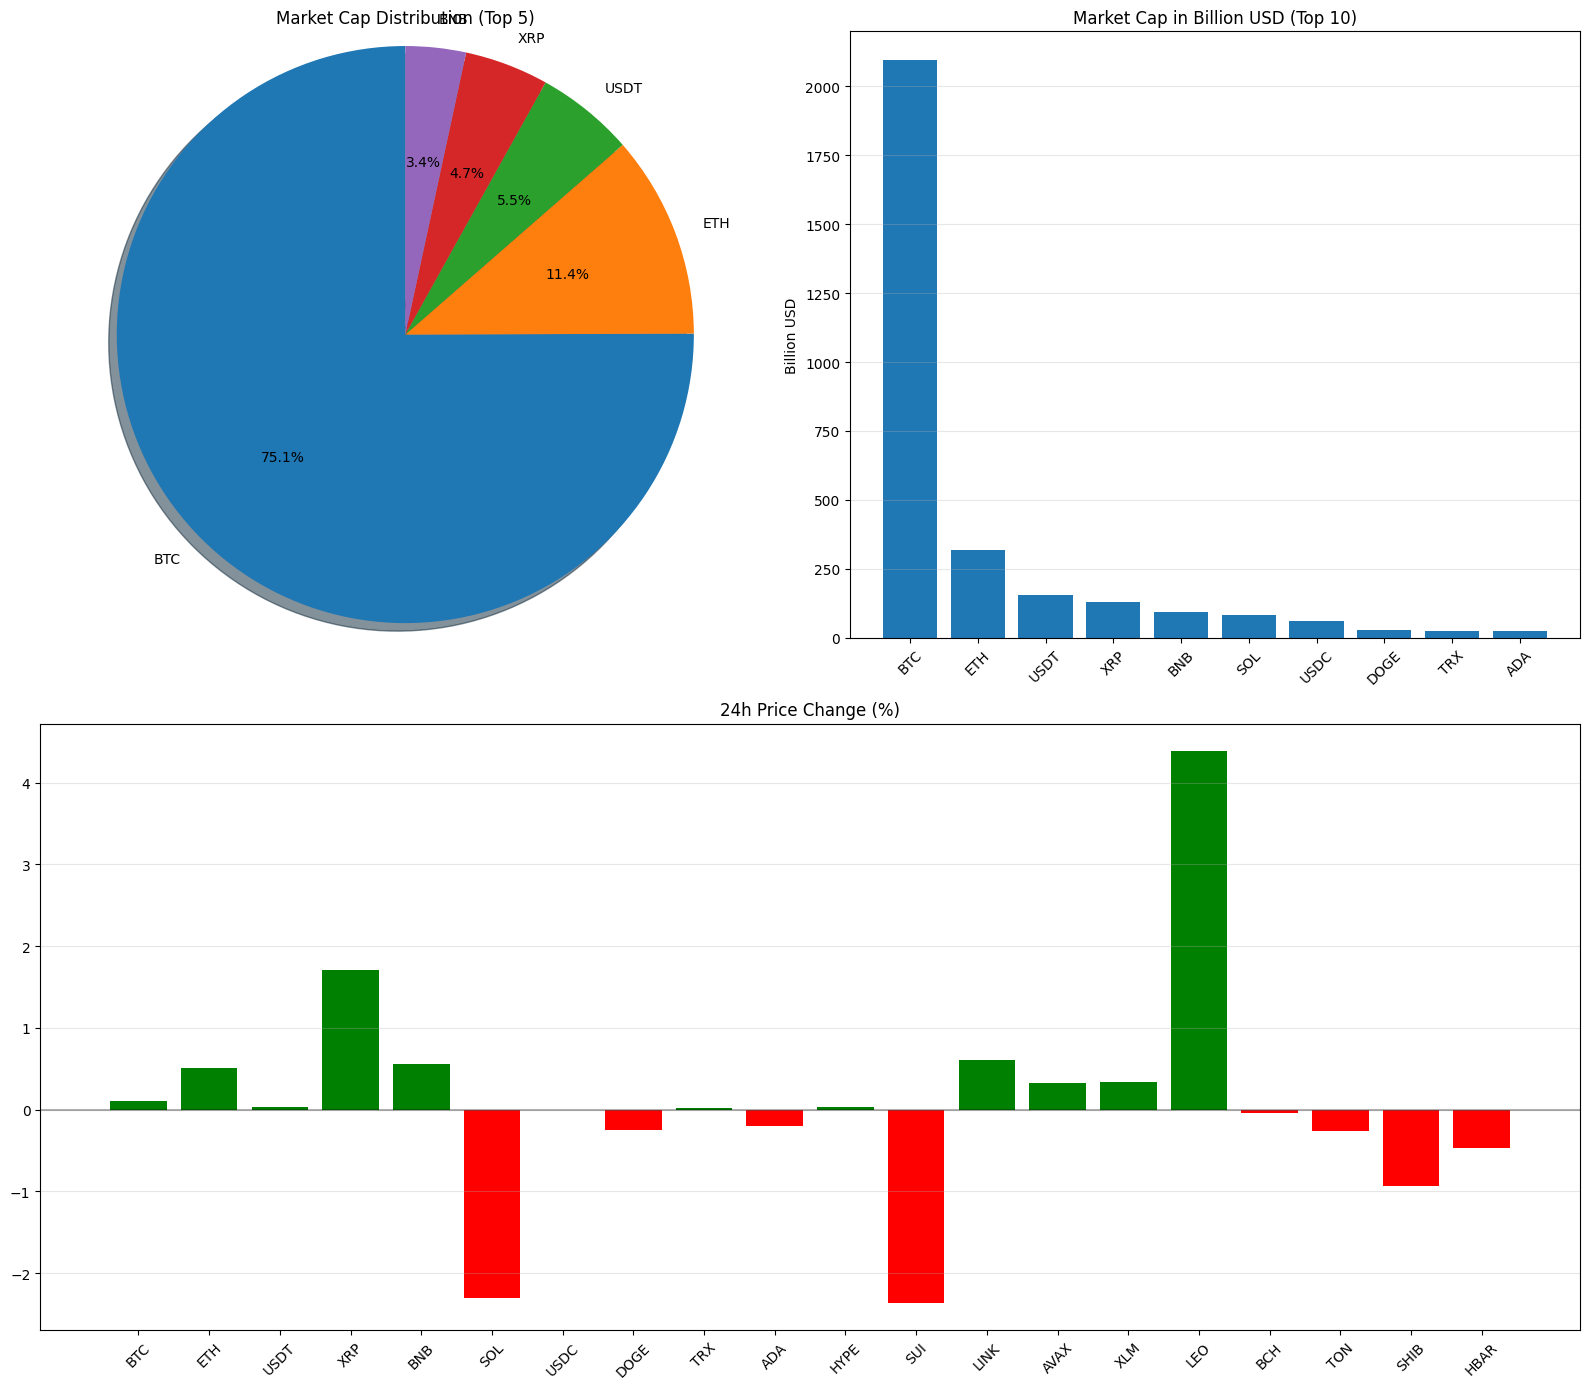

In [24]:
# Create and display the dashboard
dashboard_data = create_market_cap_dashboard()

## Conclusion

This notebook demonstrates various ways to access and analyze cryptocurrency market capitalization data using the CoinMarketCap API. The code examples show how to:

1. Fetch basic market cap data for specific cryptocurrencies
2. Track and visualize top cryptocurrencies by market cap
3. Analyze historical market cap trends
4. Compare multiple cryptocurrencies
5. Calculate additional market metrics
6. Create dashboard visualizations
7. Handle API rate limits and errors properly

Remember to replace "YOUR_API_KEY_HERE" with your actual CoinMarketCap API key before running the code.

Always check the [CoinMarketCap API documentation](https://coinmarketcap.com/api/documentation/v1/) for the most up-to-date information on endpoints and parameters.